In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')


In [11]:
df = pd.read_csv('netflix_titles.csv')
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [13]:
df.shape


(8807, 12)

In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [17]:
df.describe()


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [19]:
df.isnull().sum()


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [22]:
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna('Not Rated', inplace=True)


In [23]:
df.isnull().sum()


,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,10
release_year,0
rating,0
duration,3


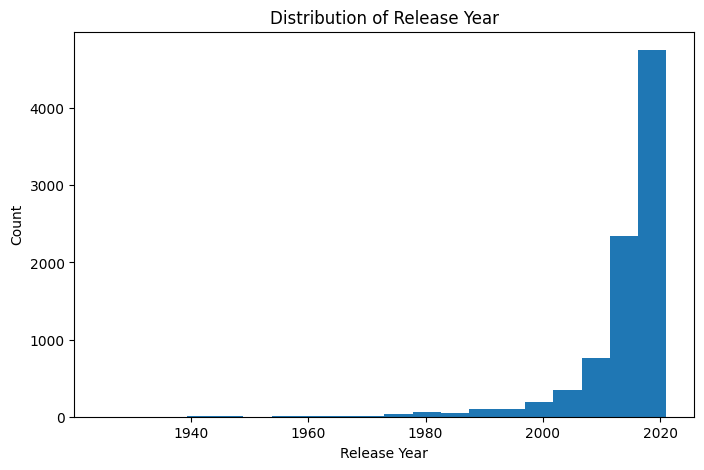

In [25]:
plt.figure(figsize=(8,5))
plt.hist(df['release_year'], bins=20)
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Distribution of Release Year')
plt.show()


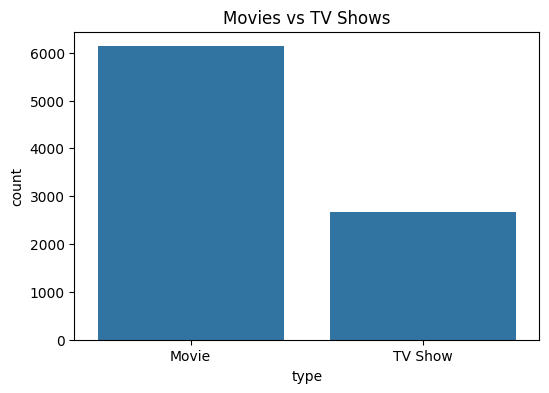

In [27]:
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=df)
plt.title('Movies vs TV Shows')
plt.show()


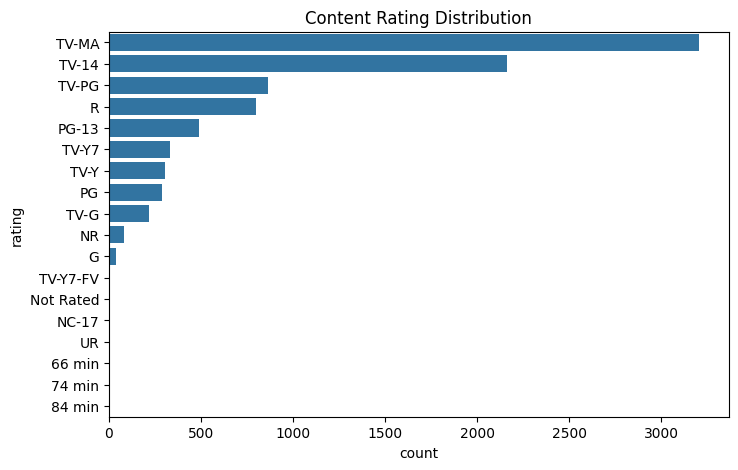

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index)
plt.title('Content Rating Distribution')
plt.show()


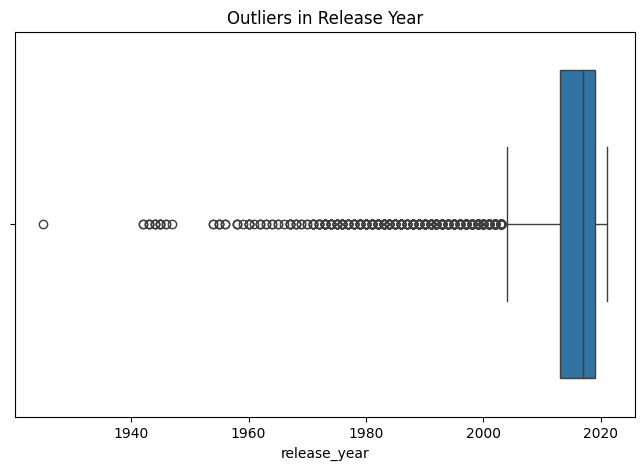

In [31]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['release_year'])
plt.title('Outliers in Release Year')
plt.show()


In [33]:
df_corr = df[['release_year']]


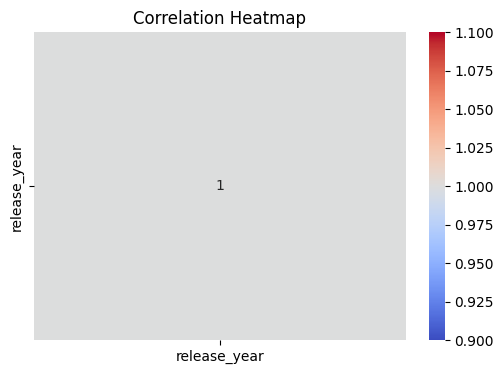

In [35]:
plt.figure(figsize=(6,4))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


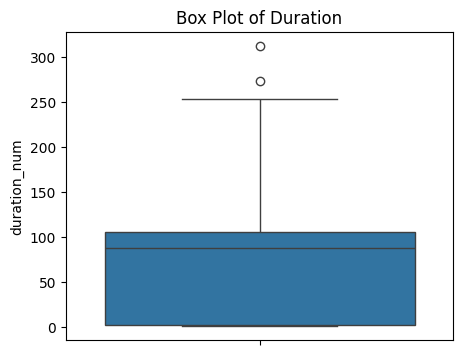

In [39]:

df['duration_num'] = df['duration'].str.extract(r'(\d+)').astype(float)


plt.figure(figsize=(5,4))
sns.boxplot(y=df['duration_num'])
plt.title("Box Plot of Duration")
plt.show()



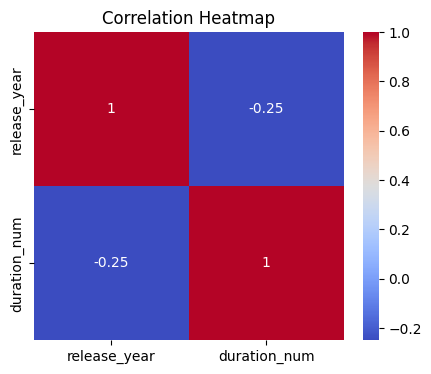

In [41]:

corr = df[['release_year', 'duration_num']].corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


/tmp/ipython-input-2604527781.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shows['duration_num'] = shows['duration'].str.extract(r'(\d+)').astype(float)


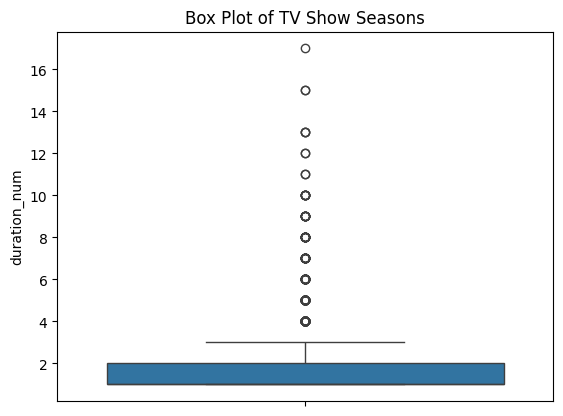

In [42]:
shows = df[df['type'] == 'TV Show']

shows['duration_num'] = shows['duration'].str.extract(r'(\d+)').astype(float)

sns.boxplot(y=shows['duration_num'])
plt.title("Box Plot of TV Show Seasons")
plt.show()
